In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

# importer utils.py
from utils import generate_random_sales

# si les dossiers n’existent pas (sécurité)
os.makedirs("data", exist_ok=True)
os.makedirs("plots", exist_ok=True)


In [2]:
dates = pd.date_range(start="2025-01-01", periods=12, freq="MS")

prodA = generate_random_sales(50, 100, 12, seed=42)
prodB = generate_random_sales(30, 80, 12, seed=43)
prodC = generate_random_sales(20, 60, 12, seed=44)
prodD = generate_random_sales(10, 50, 12, seed=45)

df_initial = pd.DataFrame({
    "Date": dates,
    "Product A": prodA,
    "Product B": prodB,
    "Product C": prodC,
    "Product D": prodD
})

df_initial.to_csv("data/initial.csv", index=False)
df_initial


,Date,Product A,Product B,Product C,Product D
0,2025-01-01,88,34,40,21
1,2025-02-01,78,30,55,40
2,2025-03-01,64,79,23,13
3,2025-04-01,92,51,52,42
4,2025-05-01,57,46,40,41
5,2025-06-01,70,47,23,31
6,2025-07-01,88,57,43,45
7,2025-08-01,68,32,42,14
8,2025-09-01,72,76,45,25
9,2025-10-01,60,60,23,11


In [3]:
df = df_initial.copy()

df["Month"] = df["Date"].dt.strftime("%Y-%m")
product_cols = ["Product A", "Product B", "Product C", "Product D"]

df["Total_Sales"] = df[product_cols].sum(axis=1)
df["Average_Sales"] = df[product_cols].mean(axis=1)
df["Month_over_Month_Growth"] = df["Total_Sales"].pct_change().fillna(0) * 100
df["Quarter"] = "Q" + df["Date"].dt.quarter.astype(str)

df["Max_Sales_Product"] = df[product_cols].idxmax(axis=1)
df["Min_Sales_Product"] = df[product_cols].idxmin(axis=1)

df.to_csv("data/final.csv", index=False)
df


,Date,Product A,Product B,Product C,Product D,Month,Total_Sales,Average_Sales,Month_over_Month_Growth,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,88,34,40,21,2025-01,183,45.75,0.000000,Q1,Product A,Product D
1,2025-02-01,78,30,55,40,2025-02,203,50.75,10.928962,Q1,Product A,Product B
2,2025-03-01,64,79,23,13,2025-03,179,44.75,-11.822660,Q1,Product B,Product D
3,2025-04-01,92,51,52,42,2025-04,237,59.25,32.402235,Q2,Product A,Product D
4,2025-05-01,57,46,40,41,2025-05,184,46.00,-22.362869,Q2,Product A,Product C
5,2025-06-01,70,47,23,31,2025-06,171,42.75,-7.065217,Q2,Product A,Product C
6,2025-07-01,88,57,43,45,2025-07,233,58.25,36.257310,Q3,Product A,Product C
7,2025-08-01,68,32,42,14,2025-08,156,39.00,-33.047210,Q3,Product A,Product D
8,2025-09-01,72,76,45,25,2025-09,218,54.50,39.743590,Q3,Product B,Product D
9,2025-10-01,60,60,23,11,2025-10,154,38.50,-29.357798,Q4,Product A,Product D


In [4]:
pivot_avg = pd.pivot_table(df, values=product_cols + ["Total_Sales"],
                           index="Quarter", aggfunc="mean")

pivot_total = df.groupby("Quarter")[product_cols + ["Total_Sales"]].sum()

with open("data/output.csv", "w") as f:
    f.write("FINAL DATAFRAME\n")
    df.to_csv(f, index=False)
    f.write("\nAVERAGE SALES PER QUARTER\n")
    pivot_avg.to_csv(f)
    f.write("\nTOTAL SALES PER QUARTER\n")
    pivot_total.to_csv(f)

pivot_avg, pivot_total


(         Product A  Product B  Product C  Product D  Total_Sales
 Quarter                                                         
 Q1       76.666667  47.666667  39.333333  24.666667   188.333333
 Q2       73.000000  48.000000  38.333333  38.000000   197.333333
 Q3       76.000000  55.000000  43.333333  28.000000   202.333333
 Q4       64.333333  47.666667  24.333333  17.666667   154.000000,
          Product A  Product B  Product C  Product D  Total_Sales
 Quarter                                                         
 Q1             230        143        118         74          565
 Q2             219        144        115        114          592
 Q3             228        165        130         84          607
 Q4             193        143         73         53          462)

In [5]:
best_month_row = df.loc[df["Total_Sales"].idxmax()]
best_month = best_month_row["Month"], int(best_month_row["Total_Sales"])

annual_totals = df[product_cols].sum()
best_product = annual_totals.idxmax(), int(annual_totals.max())

quarter_totals = df.groupby("Quarter")["Total_Sales"].sum()
best_quarter = quarter_totals.idxmax(), int(quarter_totals.max())

best_month, best_product, best_quarter


(('2025-04', 237), ('Product A', 870), ('Q3', 607))

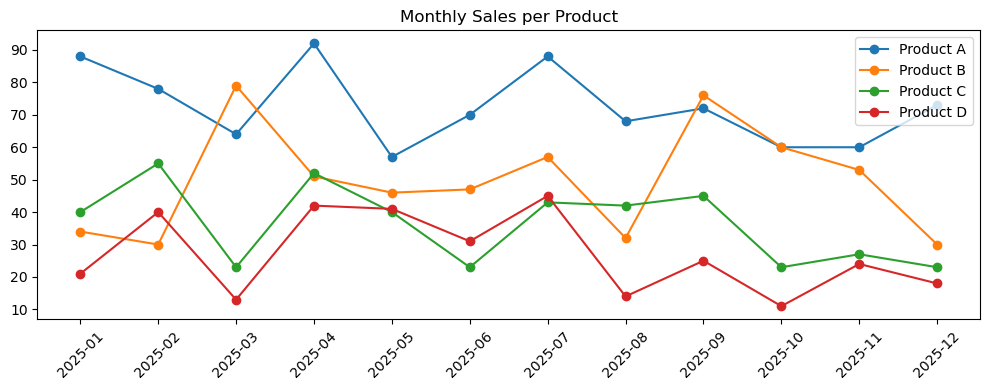

In [6]:
plt.figure(figsize=(10,4))
for col in product_cols:
    plt.plot(df["Month"], df[col], marker="o", label=col)

plt.xticks(rotation=45)
plt.title("Monthly Sales per Product")
plt.legend()
plt.tight_layout()

plt.savefig("plots/line_products.png")
plt.show()


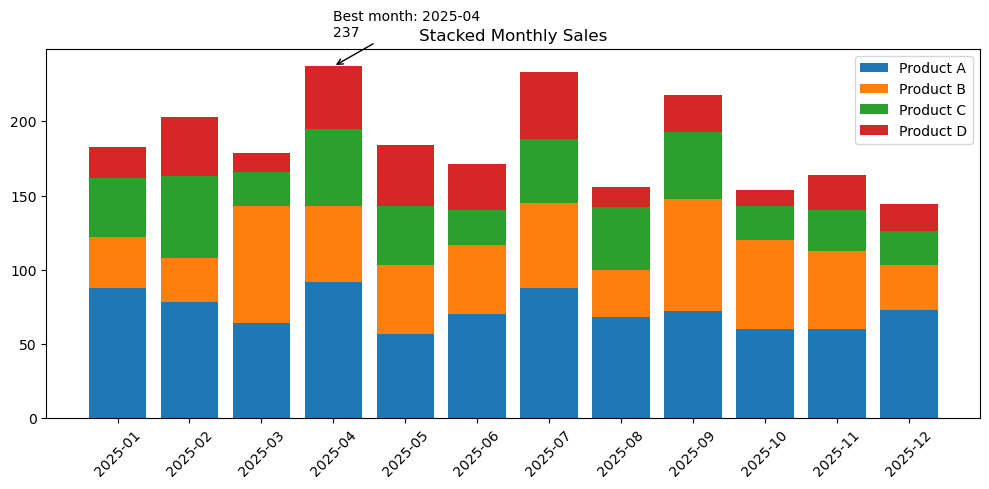

In [7]:
plt.figure(figsize=(10,5))
bottom = np.zeros(len(df))

for col in product_cols:
    plt.bar(df["Month"], df[col], bottom=bottom, label=col)
    bottom += df[col]

# annotate best month
best_idx = df["Total_Sales"].idxmax()
best_label = df.loc[best_idx, "Month"]
best_value = df.loc[best_idx, "Total_Sales"]

plt.annotate(f"Best month: {best_label}\n{best_value}",
             xy=(best_idx, best_value),
             xytext=(best_idx, best_value + 20),
             arrowprops=dict(arrowstyle="->"))

plt.xticks(rotation=45)
plt.title("Stacked Monthly Sales")
plt.legend()
plt.tight_layout()

plt.savefig("plots/stacked_monthly.png")
plt.show()


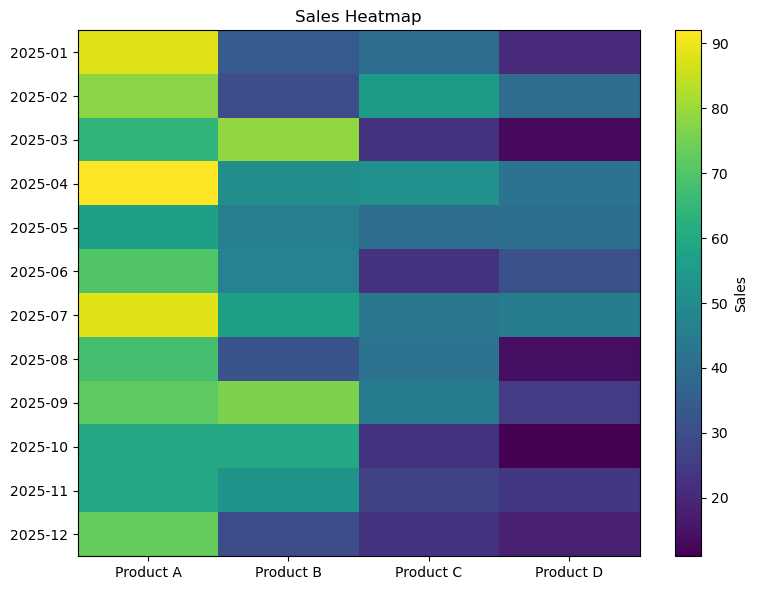

In [8]:
plt.figure(figsize=(8,6))
plt.imshow(df[product_cols].values, aspect="auto")
plt.colorbar(label="Sales")
plt.xticks(range(4), product_cols)
plt.yticks(range(12), df["Month"])
plt.title("Sales Heatmap")
plt.tight_layout()

plt.savefig("plots/heatmap_products.png")
plt.show()


C:\Users\WINDOWS 11\AppData\Local\Temp\ipykernel_29980\3759722369.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[col] for col in product_cols], labels=product_cols)


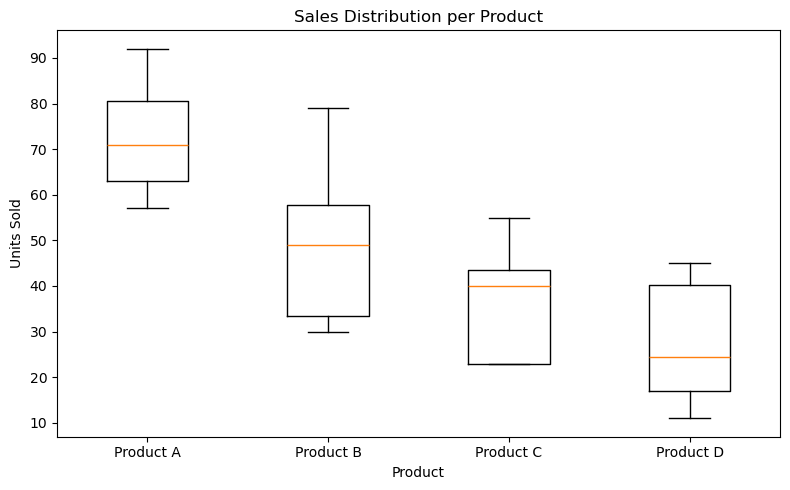

In [9]:
plt.figure(figsize=(8,5))
plt.boxplot([df[col] for col in product_cols], labels=product_cols)
plt.title("Sales Distribution per Product")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.tight_layout()

plt.savefig("plots/boxplot_products.png")
plt.show()
